## Making MNIST Unsupervised
(From Abhishek Thakur's Amazing Book ON ML)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
data = datasets.fetch_openml("mnist_784", version=1, return_X_y=True)

pixel_values, targets = data
targets = targets.astype(int)

## Visualising Sample Image

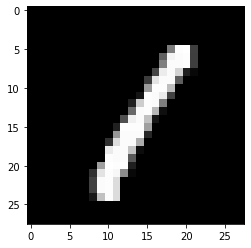

In [3]:
single_image = pixel_values[3, :].reshape(28, 28)

plt.imshow(single_image, cmap='gray')

## Applying t-SNE

In [4]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [5]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)

tsne_df.loc[:, "targets"] = tsne_df.targets.astype("int")

In [6]:
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


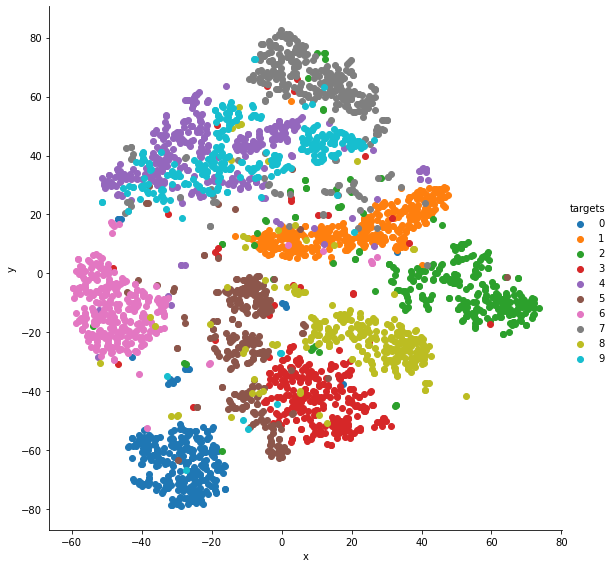

In [7]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()